# Package import

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Data Loading and preparation

In [4]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Model Preparation

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [7]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 91us/sample - loss: 1.0545 - val_loss: 0.6128
Epoch 2/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5088 - val_loss: 0.5187
Epoch 3/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4658 - val_loss: 0.4988
Epoch 4/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4476 - val_loss: 0.4778
Epoch 5/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4337 - val_loss: 0.4606
Epoch 6/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4243 - val_loss: 0.4508
Epoch 7/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4163 - val_loss: 0.4478
Epoch 8/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4123 - val_loss: 0.4532
Epoch 9/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4070 - val_l

# Results Analysis|

In [10]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 29us/sample - loss: 0.3549


In [11]:
y_pred = model.predict(X_test)
y_pred = [item for sublist in y_pred for item in sublist]

In [12]:
print("Mean Squared Error: " + str(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.35494400672705056


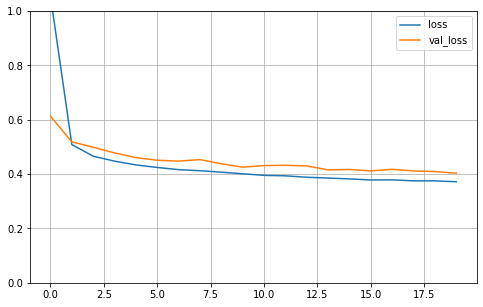

In [13]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()